# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
!pip install -- seaborn

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
master_df =  pd.read_csv('201801-fordgobike-tripdata.csv')

In [30]:
master_df['start_time'] = pd.to_datetime(master_df['start_time'])
master_df['end_time'] = pd.to_datetime(master_df['end_time'])
master_df['start_station_id'] = master_df['start_station_id'].astype(str)
master_df['end_station_id'] = master_df['end_station_id'].astype(str)
master_df['bike_id'] = master_df['bike_id'].astype(str)

In [31]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 19 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null datetime64[ns]
end_time                   94802 non-null datetime64[ns]
start_station_id           94802 non-null object
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null object
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null object
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
travel_day                 94802 non-null object
travel_month               94802 non-n

In [26]:
master_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,travel_day,travel_month,travel_year
94797,695,2018-01-01 00:19:58.761,2018-01-01 00:31:33.832,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,-122.392741,3671,Customer,NaN,NaN,No,Monday,January,2018
94798,600,2018-01-01 00:19:48.761,2018-01-01 00:29:49.074,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,19,Post St at Kearny St,37.788975,-122.403452,603,Customer,NaN,NaN,No,Monday,January,2018
94799,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992.0,Male,No,Monday,January,2018
94800,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986.0,Male,No,Monday,January,2018
94801,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957.0,Male,No,Monday,January,2018


In [16]:
print(master_df.loc[94801].start_time)
print(master_df.loc[94801].start_time.year,master_df.loc[94801].start_time.month,master_df.loc[94801].start_time.day,master_df.loc[94801].start_time.date(),master_df.loc[94801].start_time.time())

2018-01-01 00:07:41.040000
2018 1 1 2018-01-01 00:07:41.040000


In [18]:
master_df.loc[94801].start_time.strftime('%A') , master_df.loc[94801].start_time.strftime('%A') 

('Monday', 'Monday')

datetime.date(2018, 2, 1)

In [25]:
master_df['travel_day'] = master_df.start_time.dt.strftime('%A') 
master_df['travel_month'] = master_df.start_time.dt.strftime('%B') 
master_df['travel_year'] =  master_df.start_time.dt.strftime('%Y') 
#master_df['travel_time'] = master_df.loc[0].end_time.strftime('%H:%M')

In [27]:
master_df['travel_year'].value_counts()

2018    94802
Name: travel_year, dtype: int64

In [11]:
master_df['duration_sec'].describe()

count    94802.000000
mean       870.935930
std       2550.596891
min         61.000000
25%        359.000000
50%        555.000000
75%        854.000000
max      85546.000000
Name: duration_sec, dtype: float64

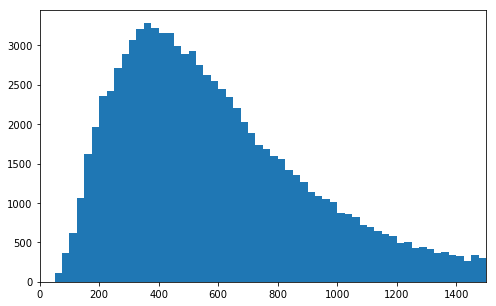

In [22]:
plt.figure(figsize=[8,5])
bins= np.arange(0,master_df['duration_sec'].max()+25,25)
plt.hist(data=master_df,x='duration_sec',bins = bins);
plt.xlim(0,1500);

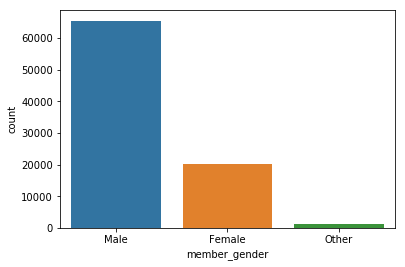

In [23]:
sb.countplot(data=master_df,x='member_gender');

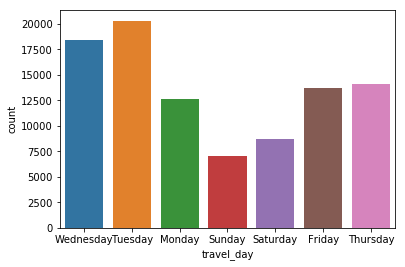

In [24]:
sb.countplot(data=master_df,x='travel_day');

Questions

•	When are most trips taken in terms of time of day, day of the week, or month of the year?

•	How long does the average trip take?

•	Does the above depend on if a user is a subscriber or customer?

